In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


drive_mount = False
if drive_mount:
    from google.colab import drive
    drive.mount('/content/drive/')
    DATA_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/datasets"
    MODEL_DIR = "/content/drive/MyDrive/Colab_Notebooks/COMP0036/models"
else:
    DATA_DIR = "../processed_df"
    MODEL_DIR = "../models"
    
DROP_COLS = ['FTR', 'HomeTeam', 'AwayTeam', 'Date', 'HTR', 'Referee', 'Year', 'Team_Home', 'Team_Away']

ELO_DATA_DIR = f"{DATA_DIR}/elo.csv"
AVG_DATA_DIR = f"{DATA_DIR}/history.csv"
SEASON_DATA_DIR = f"{DATA_DIR}/season.csv"
EXPENDITURE_DATA_DIR = f"{DATA_DIR}/expenditure_and_income.csv"

# Data Preprocessing

In [14]:
elo_df = pd.read_csv(ELO_DATA_DIR)
avg_df = pd.read_csv(AVG_DATA_DIR)
season_df = pd.read_csv(SEASON_DATA_DIR)
exp_df = pd.read_csv(EXPENDITURE_DATA_DIR)

FTR = elo_df[['FTR']]
FTR2 = exp_df[['FTR']]
elo_df = elo_df[['HomeElo', 'AwayElo']]
elo_df['EloDiff'] = elo_df['HomeElo'] - elo_df['AwayElo']
avg_df = avg_df.drop(DROP_COLS, axis=1, errors='ignore')
season_df = season_df.drop(DROP_COLS, axis=1, errors='ignore')
exp_df = exp_df.drop(DROP_COLS, axis=1, errors='ignore')

train_df = pd.concat((exp_df, elo_df, FTR, FTR2), axis=1).dropna()
train_df.to_csv(f"{DATA_DIR}/history_and_elo.csv", index=False)
train_df

,HomeTeamExpenditure,HomeTeamIncome,HomeTeamBalance,AwayTeamExpenditure,AwayTeamIncome,AwayTeamBalance,HomeElo,AwayElo,EloDiff,FTR,FTR
0,20.80,0.532,-20.27,20.28,1.460,-18.810,1500.000000,1500.000000,0.000000,1,H
1,52.39,37.720,-14.67,18.65,42.400,23.750,1500.000000,1500.000000,0.000000,1,H
2,19.00,26.280,7.28,33.47,10.000,-23.470,1500.000000,1500.000000,0.000000,-1,A
3,13.33,6.880,-6.45,0.00,0.145,0.145,1500.000000,1500.000000,0.000000,0,D
4,53.15,12.330,-40.82,34.48,35.550,1.070,1500.000000,1500.000000,0.000000,1,H
...,...,...,...,...,...,...,...,...,...,...,...
8835,137.56,156.400,18.84,40.50,82.800,42.300,1654.830595,1540.074128,114.756466,0,A
8836,93.00,32.550,-60.45,22.75,0.000,-22.750,1760.063825,1524.257614,235.806211,1,H
8837,100.35,195.900,95.55,68.47,52.600,-15.870,1569.364767,1484.013329,85.351438,-1,D
8838,172.00,60.700,-111.30,122.05,64.820,-57.230,1689.671042,1454.968736,234.702306,1,H


# Visualisation

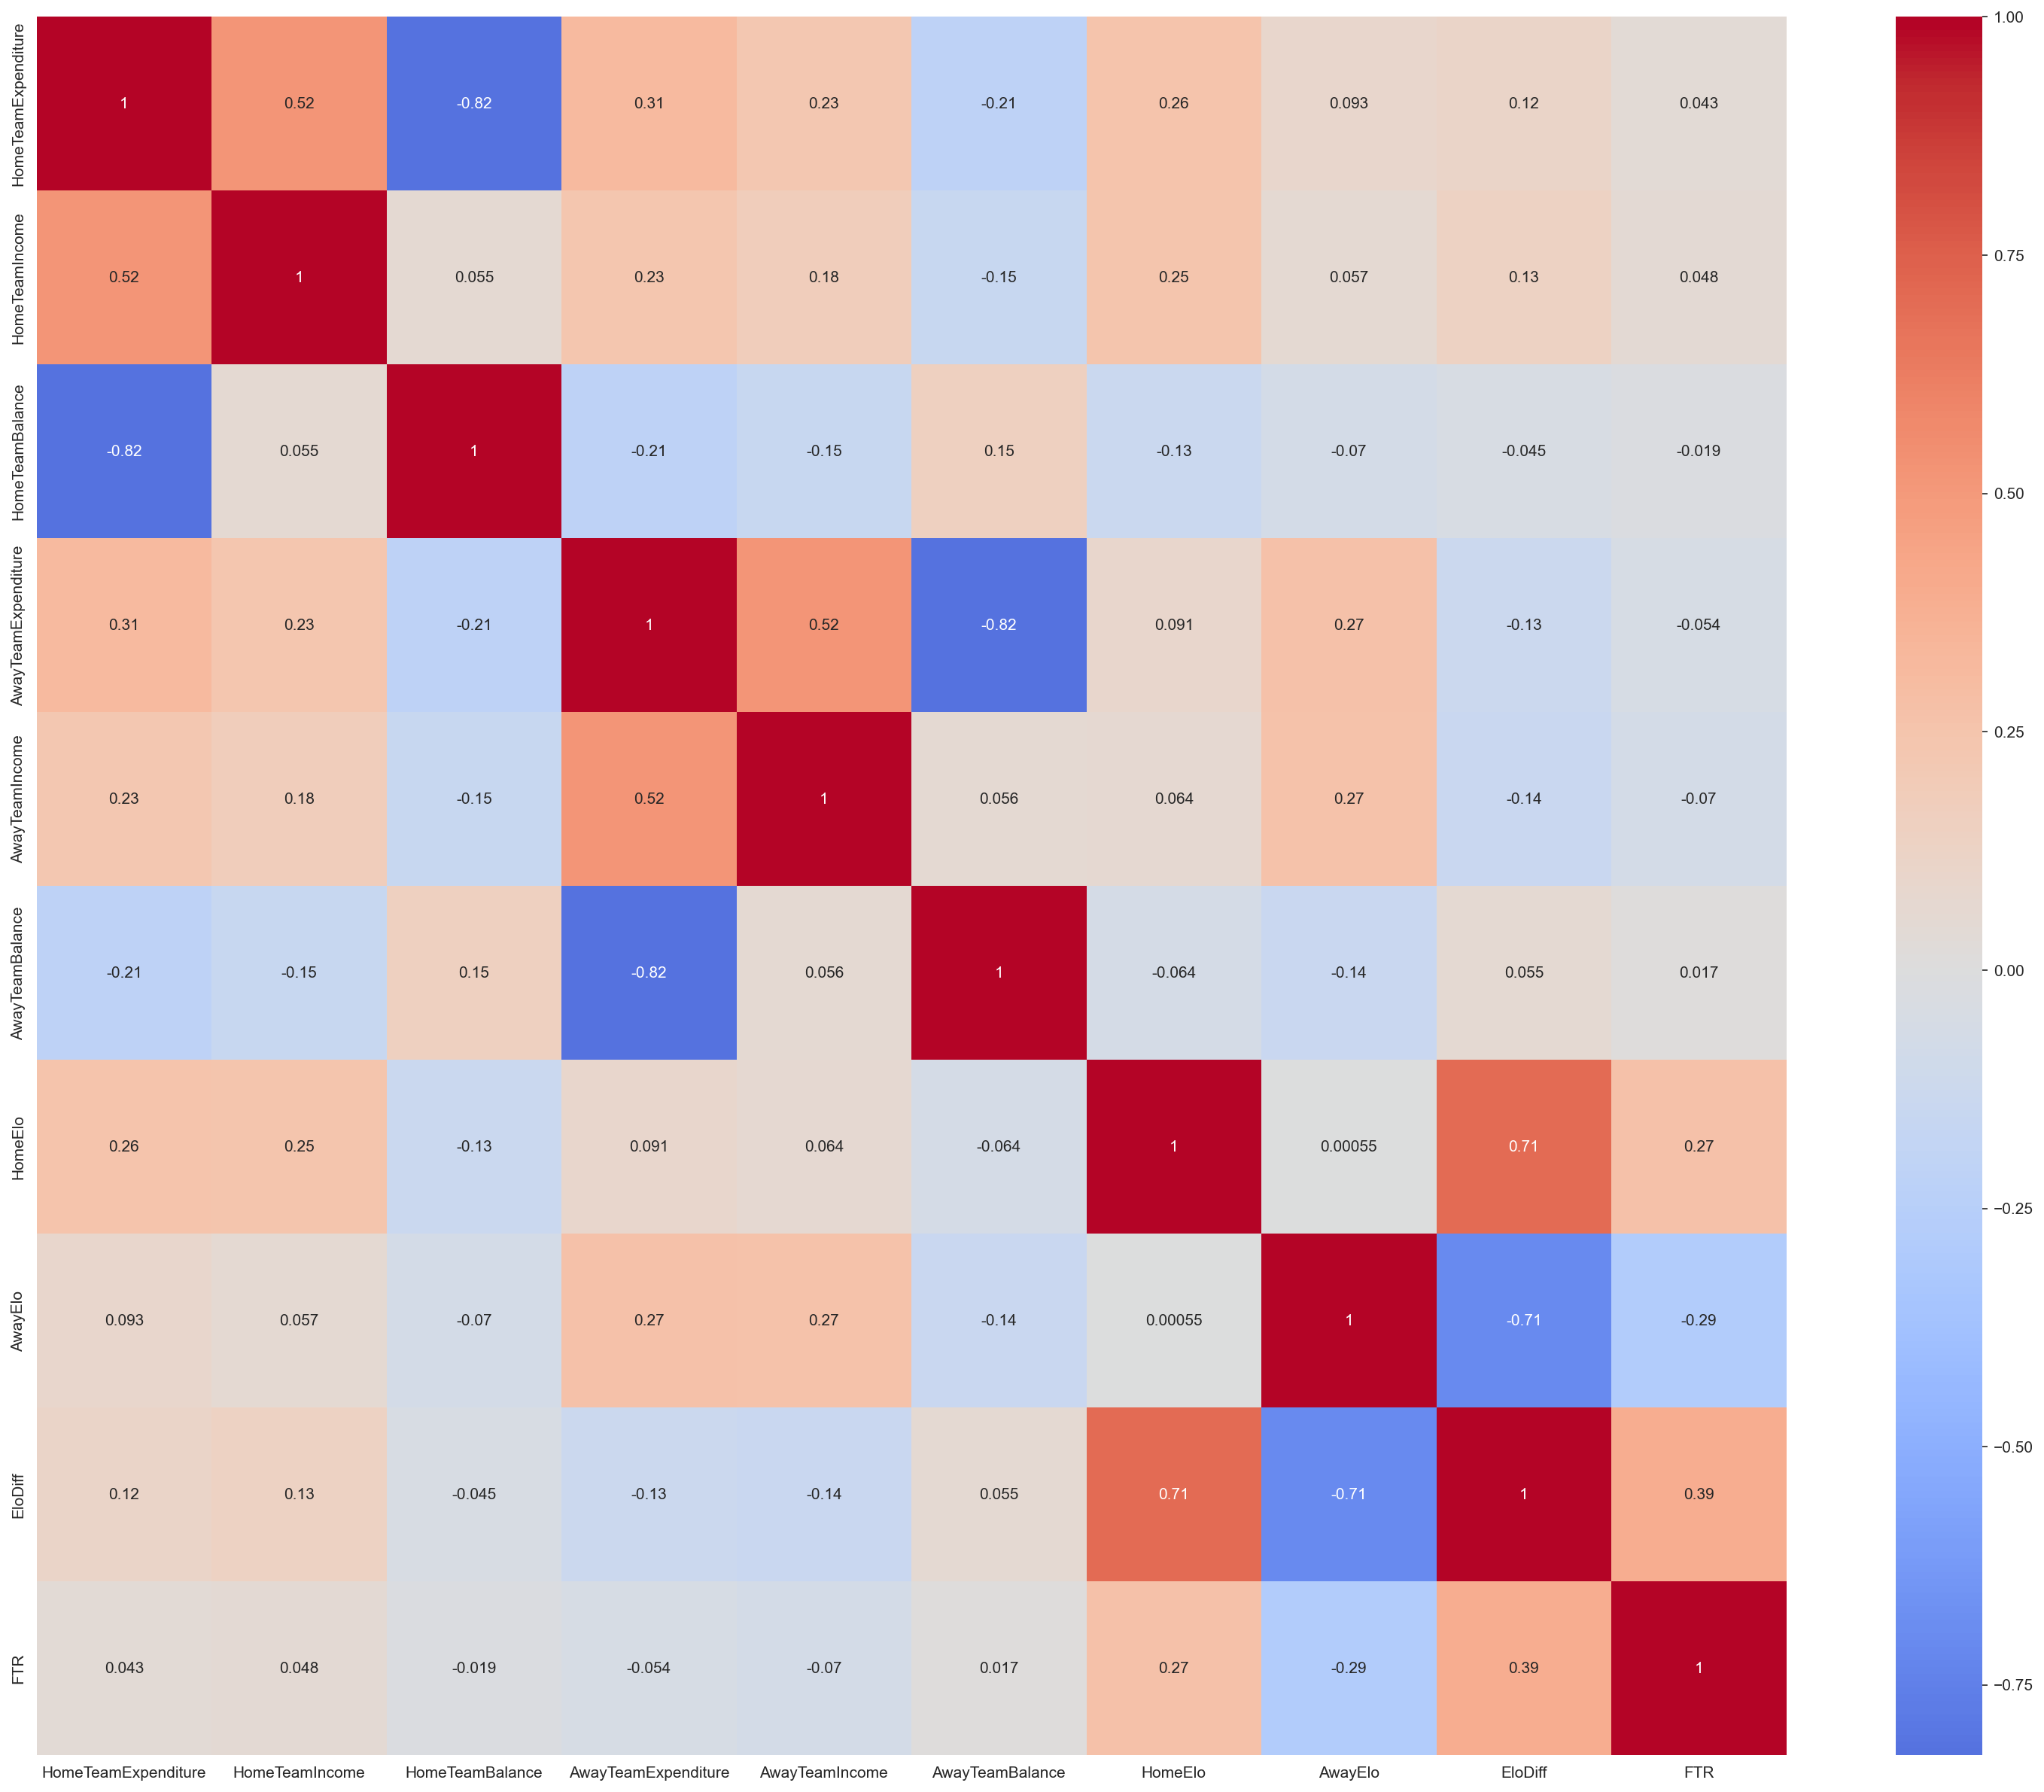

In [10]:
plt.figure(figsize=(25, 20), dpi=150)
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.show()

### Feature Selection

In [4]:
UNIMPORTANT_COLS = ['HF', 'AF', 'HR', 'AR']

columns_to_drop = []
for search_str in UNIMPORTANT_COLS:
    columns_to_drop = columns_to_drop + [col for col in train_df.columns if search_str in col] 

# Drop these columns
train_df = train_df.drop(columns=columns_to_drop, axis=1)
train_df

,home_rest_time,away_rest_time,HomeFTHG_all_avg_25,AwayFTHG_all_avg_25,HomeFTAG_all_avg_25,AwayFTAG_all_avg_25,HomeHTHG_all_avg_25,AwayHTHG_all_avg_25,HomeHTAG_all_avg_25,AwayHTAG_all_avg_25,...,AwayAST_same_avg_2,HomeHC_same_avg_2,AwayAC_same_avg_2,HomeHY_same_avg_2,AwayAY_same_avg_2,Awayhome_rest_time_same_avg_2,Awayaway_rest_time_same_avg_2,HomeElo,AwayElo,FTR
0,98.0,98.0,1.24,1.04,1.16,0.92,0.60,0.56,0.56,0.48,...,3.0,9.5,3.5,1.5,1.5,5.5,5.5,1500.000000,1500.000000,1
1,98.0,98.0,1.32,0.88,1.60,1.44,0.68,0.32,0.80,0.60,...,2.5,4.5,4.5,2.0,2.0,6.5,13.5,1500.000000,1500.000000,1
2,98.0,98.0,1.52,1.68,1.28,1.00,0.60,0.60,0.56,0.40,...,1.5,8.5,0.0,2.0,1.0,7.0,6.5,1500.000000,1500.000000,-1
3,99.0,99.0,1.24,0.84,0.92,1.84,0.64,0.32,0.52,0.68,...,6.0,4.0,3.5,1.5,0.0,8.0,7.5,1500.000000,1500.000000,0
4,100.0,100.0,1.92,2.16,1.08,0.88,0.92,0.96,0.76,0.40,...,5.5,7.5,3.5,0.5,1.0,3.0,2.5,1500.000000,1500.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,7.0,7.0,1.12,1.48,1.00,1.24,0.40,0.80,0.28,0.48,...,3.5,8.5,4.5,0.5,1.0,15.5,8.5,1604.547860,1493.171549,1
6100,7.0,7.0,2.72,2.00,1.28,0.48,1.08,0.72,0.48,0.24,...,3.0,3.0,4.5,0.5,1.5,6.5,7.5,1480.242685,1683.390333,-1
6101,8.0,6.0,2.12,1.36,1.20,1.16,0.84,0.56,0.68,0.44,...,2.5,10.0,1.0,1.0,3.0,9.0,7.0,1661.007643,1462.722257,1
6102,7.0,8.0,1.48,1.76,1.36,0.96,0.88,0.88,0.72,0.44,...,2.0,3.0,6.5,1.0,1.0,10.5,12.0,1473.247668,1482.821839,0


### PCA

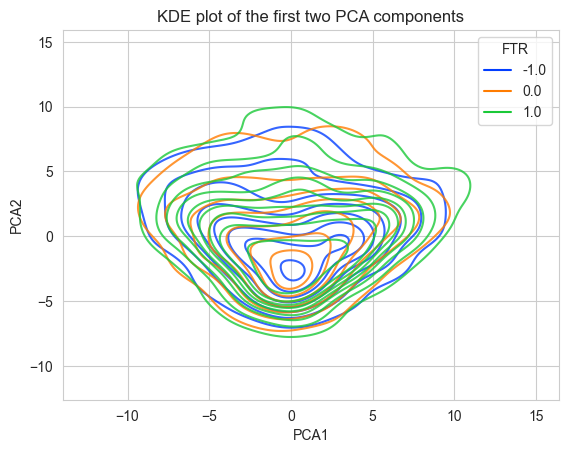

In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


X = train_df.drop('FTR', axis=1).dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['FTR'] = train_df['FTR']  # Add the 'FTR' column for coloring

# Plot
sns.kdeplot(data=pca_df, x='PCA1', y='PCA2', hue='FTR', palette='bright', alpha=0.8)
plt.title('KDE plot of the first two PCA components')
plt.show()


# ML models

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

USE_XGBOOST = False

# Sample DataFrame
df = train_df.copy()

# Drop rows with NaN values and explicitly create a new copy
df = df.dropna()

# Encode the 'FTR' column
target_column = 'FTR'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])  # W, D, L becomes 0, 1, 2

# Features and Target
X = df.drop(target_column, axis=1)
# X = df.drop(['HomeElo', 'AwayElo'], axis=1)
X = scaler.fit_transform(X)
y = df[target_column]

# Define 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Logistic Regression Model with Cross-Validation
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
logistic_scores = cross_val_score(logistic_model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

# Random Forest Classifier Model with Cross-Validation
random_forest_model = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(random_forest_model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)

# XGBoost Classifier Model with Cross-Validation
if USE_XGBOOST:
    from xgboost import XGBClassifier
    xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
    xgboost_scores = cross_val_score(xgboost_model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)


# SVM Classifier Model with Cross-Validation
svm_model = SVC(probability=True)
svm_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy', n_jobs=-1)


# Displaying the results
print(f"Logistic Regression CV Accuracy: {logistic_scores.mean():.4f} (+/- {logistic_scores.std() * 2:.4f})")
print(f"Random Forest CV Accuracy: {forest_scores.mean():.4f} (+/- {forest_scores.std() * 2:.4f})")
if USE_XGBOOST:
    print(f"XGBoost CV Accuracy: {xgboost_scores.mean():.4f} (+/- {xgboost_scores.std() * 2:.4f})")
print(f"SVM CV Accuracy: {svm_scores.mean():.4f} (+/- {svm_scores.std() * 2:.4f})")


Logistic Regression CV Accuracy: 0.5326 (+/- 0.0329)
Random Forest CV Accuracy: 0.5165 (+/- 0.0283)
SVM CV Accuracy: 0.5265 (+/- 0.0198)


In [21]:
# To predict and get probabilities
# Example Elo ratings for prediction
from sklearn.svm import SVC
import pandas as pd
if USE_XGBOOST:
    from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = train_df.copy()
df['FTR'] += 1

# Specify the name of the target column
target_column = 'FTR'  # Replace with the name of your target column

# Features and Target
X = df.drop(target_column, axis=1) 
# X = X[['HomeElo', 'AwayElo']]
X = scaler.fit_transform(X)
y = df[target_column]               # Target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Creating and training the logistic regression model
logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, penalty='l2')
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

svm_model = SVC(probability=True)  # Set probability to True if you need probability estimates
svm_model.fit(X_train, y_train)

# Creating and training the XGBoost model
if USE_XGBOOST:
    xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgboost_model.fit(X_train, y_train)

    # Plotting feature importance
    plot_importance(xgboost_model)
    plt.show()

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print("Model: Logistic Regression")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

y_pred = random_forest_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
print("Model: Random Forest")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

if USE_XGBOOST:
    y_pred = xgboost_model.predict(X_test)
    
    # Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1)
    
    print("Model: XGBoost")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)

# Predicting on the test set with SVM
y_pred = svm_model.predict(X_test)

# Evaluating the SVM model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

print("Model: Support Vector Machine (SVM)")
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Model: Logistic Regression
Accuracy: 0.5314232902033271
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.51      0.50       330
           1       0.36      0.09      0.15       256
           2       0.57      0.77      0.65       496

    accuracy                           0.53      1082
   macro avg       0.47      0.46      0.44      1082
weighted avg       0.50      0.53      0.49      1082

Model: Random Forest
Accuracy: 0.5231053604436229
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.55      0.53       330
           1       0.24      0.05      0.08       256
           2       0.56      0.75      0.64       496

    accuracy                           0.52      1082
   macro avg       0.43      0.45      0.42      1082
weighted avg       0.47      0.52      0.47      1082
Model: Support Vector Machine (SVM)
Accuracy: 0.5406654343807763
Classification Repor

### EloDiff impact

C:\Users\jerew\AppData\Local\Temp\ipykernel_50088\2027999422.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


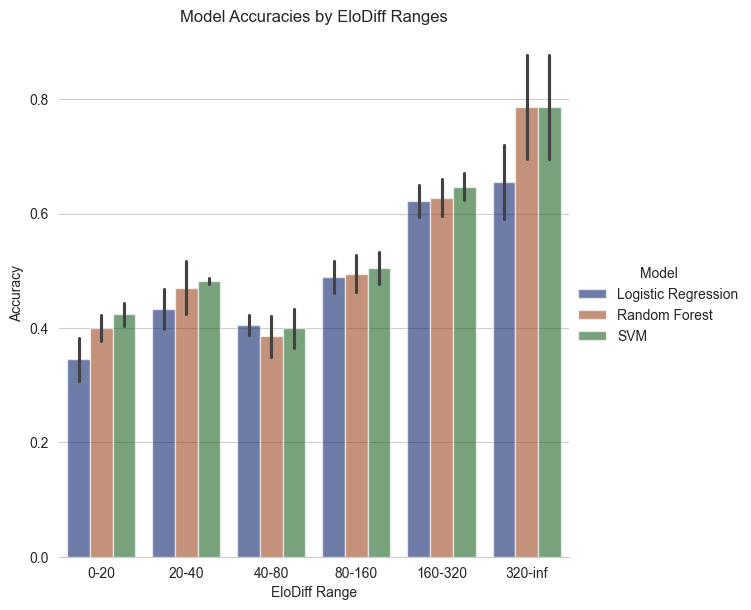

In [22]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming train_df is defined and has a column 'EloDiff'
df = train_df.copy()

# Drop rows with NaN values and create a new copy
df = df.dropna()

# Define EloDiff ranges
elo_ranges = [(0, 20), (20, 40), (40, 80), (80, 160), (160, 320), (320, float('inf'))]

# Define models
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True)
}

# Encode the target column
target_column = 'FTR'
label_encoder = LabelEncoder()
df[target_column] = label_encoder.fit_transform(df[target_column])

# Features and Target for the entire dataset
X = df.drop(target_column, axis=1)
X = StandardScaler().fit_transform(X)
y = df[target_column]

# Initialize a list to store results
results_list = []

# Define 5-fold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train each model on the entire dataset
for model_name, model in models.items():
    model.fit(X, y)  # Train on the entire dataset
    # Validate the model on different subsets of EloDiff
    for min_elo, max_elo in elo_ranges:
        elo_subset = (abs(df['EloDiff']) >= min_elo) & (abs(df['EloDiff']) < max_elo)
        # Perform cross-validation on the subset
        subset_scores = cross_val_score(model, X[elo_subset], y[elo_subset], cv=kf, scoring='accuracy', n_jobs=-1)
        for fold_idx, score in enumerate(subset_scores):
            results_list.append({
                'EloDiff': f'{min_elo}-{max_elo}',
                'Model': model_name,
                'Fold': fold_idx + 1,
                'Accuracy': score
            })

# Create a DataFrame from the list of results
results_df = pd.DataFrame(results_list)

# Display the results DataFrame
results_df

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming results_df is the DataFrame with the EloDiff ranges, accuracies, and models
# Extract the unique values from 'EloDiff' as a list in the order you want them to appear
elo_diff_order = results_df['EloDiff'].unique().tolist()

# Creating a catplot grouped barplot with a specified order for x-axis categories
g = sns.catplot(
    data=results_df,
    kind="bar",
    x="EloDiff",
    y="Accuracy",
    hue="Model",
    ci="sd",
    palette="dark",
    alpha=.6,
    height=6,
    order=elo_diff_order  # Set the x-axis categories order
)

# Set the title and labels
g.despine(left=True)
g.set_axis_labels("EloDiff Range", "Accuracy")
g.legend.set_title("Model")
plt.title('Model Accuracies by EloDiff Ranges')

# Show the plot
plt.show()


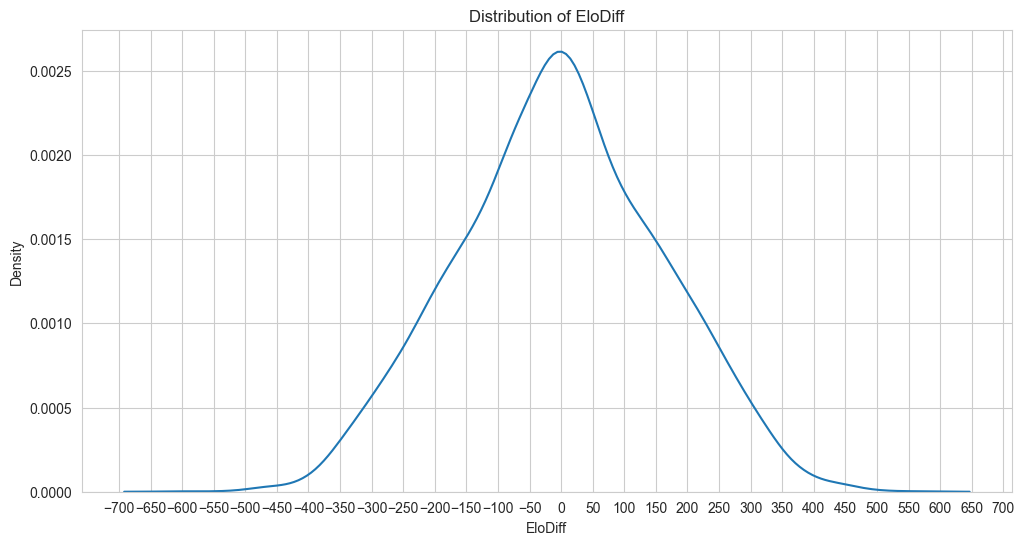

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df = train_df.copy()
# Assuming df is the DataFrame and has a column 'EloDiff'
# Create the distribution plot for 'EloDiff'
plt.figure(figsize=(12, 6))
ax = sns.kdeplot(df['EloDiff'])
xticks = range(-700, 701, 50)  # Example x-ticks
ax.set_xticks(xticks)
plt.title('Distribution of EloDiff')
plt.show()


# DL models

## mlp

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define the MLP class
class MLP(nn.Module):
    def __init__(self, input_dim, layer_num, output_dim, hidden_dim):
        super(MLP, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(input_dim, hidden_dim))
        for _ in range(1, layer_num - 1):
            self.layers.append(nn.Linear(hidden_dim, hidden_dim))
        self.layers.append(nn.Linear(hidden_dim, output_dim))

    def forward(self, x):
        for layer in self.layers[:-1]:
            x = torch.relu(layer(x))
        x = self.layers[-1](x)
        return x

# Check for GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume 'df' is your DataFrame
df = train_df.copy()

# Preprocess DataFrame
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values  # Last column

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode labels ('H', 'D', 'A') to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert to PyTorch tensors (keep them on CPU for now)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Create a custom dataset
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Model Parameters
input_dim = X.shape[1]  # Number of features
output_dim = 3  # For three categories
layer_num = 5  # Number of layers
hidden_dim = 20  # Number of neurons in hidden layer
learning_rate = 0.001
epochs = 250
batch_size = 16

# Create dataset and dataloader
dataset = CustomDataset(X_tensor, y_tensor)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the MLP and transfer to device
model = MLP(input_dim, layer_num, output_dim, hidden_dim).to(device)

# Loss and Optimizer with L2 Regularization
weight_decay = 1e-3  # L2 regularization factor
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.CrossEntropyLoss()

# Early Stopping Parameters
early_stopping_patience = 10  # Number of epochs to wait for improvement before stopping
early_stopping_counter = 0  # Counter for epochs without improvement
best_val_loss = float('inf')  # Best validation loss seen so far

# Training and Validation Loop
for epoch in range(epochs):
    # Training Phase
    model.train()
    total_train_loss = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)

    # Validation Phase
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for data, target in val_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)

    print(f'Epoch [{epoch+1}/{epochs}], Training Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss


Epoch [1/250], Training Loss: 1.0114, Validation Loss: 0.9693
Epoch [2/250], Training Loss: 0.9719, Validation Loss: 0.9708
Epoch [3/250], Training Loss: 0.9682, Validation Loss: 0.9681
Epoch [4/250], Training Loss: 0.9671, Validation Loss: 0.9716
Epoch [5/250], Training Loss: 0.9648, Validation Loss: 0.9678
Epoch [6/250], Training Loss: 0.9645, Validation Loss: 0.9693
Epoch [7/250], Training Loss: 0.9637, Validation Loss: 0.9677
Epoch [8/250], Training Loss: 0.9624, Validation Loss: 0.9700
Epoch [9/250], Training Loss: 0.9610, Validation Loss: 0.9726
Epoch [10/250], Training Loss: 0.9592, Validation Loss: 0.9719
Epoch [11/250], Training Loss: 0.9587, Validation Loss: 0.9713
Epoch [12/250], Training Loss: 0.9570, Validation Loss: 0.9709
Epoch [13/250], Training Loss: 0.9580, Validation Loss: 0.9712
Epoch [14/250], Training Loss: 0.9557, Validation Loss: 0.9749
Epoch [15/250], Training Loss: 0.9539, Validation Loss: 0.9752
Epoch [16/250], Training Loss: 0.9544, Validation Loss: 0.9739
E

KeyboardInterrupt: 